**Table of contents**<a id='toc0_'></a>    
- [Unsupervised Learning](#toc1_)    
  - [Clustering](#toc1_1_)    
    - [K-Means clustering](#toc1_1_1_)    
    - [Agglomerative clustering](#toc1_1_2_)    
      - [Ward linkage](#toc1_1_2_1_)    
      - [Complete linkage](#toc1_1_2_2_)    
      - [Single linkage](#toc1_1_2_3_)    
    - [DBSCAN](#toc1_1_3_)    
    - [Clustering metrics](#toc1_1_4_)    
    - [Number of clusters](#toc1_1_5_)    
  - [Dimensionality reduction](#toc1_2_)    
    - [PCA (Principal Component Analysis)](#toc1_2_1_)    
- [Resources](#toc2_)    
- [References](#toc3_)    
- [Acknowledgements](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Unsupervised Learning](#toc0_)

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Unsupervised Learning Class
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

## <a id='toc1_1_'></a>[Clustering](#toc0_)

### <a id='toc1_1_1_'></a>[K-Means clustering](#toc0_)

![](https://cdn.sanity.io/images/kuana2sp/production/4a7a2b92082d482c56e0c6396064ca23074168ac-1020x752.png?w=1080&fit=max&auto=format)  
(Source: [Getting started with k-means clustering in Python, Dr J Rogel-Salazar](https://domino.ai/blog/getting-started-with-k-means-clustering-in-python))

In [3]:
# K-means
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

# Creating 3 clusters artificially to illustrate the algorithm
n_samples = 1500
X, y = datasets.make_blobs(n_samples=n_samples, centers=3, cluster_std=0.7, n_features=2, random_state=0)

Review initial data:

In [4]:
# Matplotlib
# plt.figure(figsize=(5, 5))
# plt.scatter(X[:, 0], X[:, 1],alpha=0.5,)
# plt.show()

# Plotly
fig = px.scatter(x=X[:, 0], y=X[:, 1], opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

In [5]:
# Matplotlib
# plt.style.use('classic')

# Plotly
import plotly.io as pio
pio.templates.default = 'simple_white'

Run clustering with:

a) k = 3

In [6]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)
pred = kmeans.predict(X)

# Matplotlib
# plt.figure(figsize=(5, 5))
# plt.scatter(X[:, 0], X[:, 1], c=pred, alpha=0.5)
# plt.show()

# Plotly
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

b) k = 2

In [7]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
pred = kmeans.predict(X)

# Matplotlib
# plt.figure(figsize=(5, 5))
# plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
# plt.show()

# Plotly
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

c) k = 4

In [8]:
kmeans = cluster.KMeans(n_clusters=4)
kmeans.fit(X)
pred = kmeans.predict(X)

# Matplotlib
# plt.figure(figsize=(5, 5))
# plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
# plt.show()

# Plotly
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

### <a id='toc1_1_2_'></a>[Agglomerative clustering](#toc0_)

![](https://media.geeksforgeeks.org/wp-content/uploads/20200204181551/Untitled-Diagram71.png)  
(Source: [Hierarchical Clustering in Machine Learning, Geeks 4 Geeks](https://www.geeksforgeeks.org/ml-hierarchical-clustering-agglomerative-and-divisive-clustering/))

In [9]:
from sklearn import cluster

#### <a id='toc1_1_2_1_'></a>[Ward linkage](#toc0_)

In [10]:
# ward linkage tends to produce relatively equally sized clusters
agglomerative = cluster.AgglomerativeClustering(n_clusters=3, linkage='ward')
pred = agglomerative.fit_predict(X)

# Matplotlib
# plt.figure(figsize=(5, 5))
# plt.scatter(X[:, 0], X[:, 1], c=pred, alpha=0.5)
# plt.show()

# Plotly
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

#### <a id='toc1_1_2_2_'></a>[Complete linkage](#toc0_)

In [11]:
# complete linkage penalizes heavily outliers
agglomerative = cluster.AgglomerativeClustering(n_clusters=3,linkage='complete')
pred = agglomerative.fit_predict(X)

# Matplotlib
# plt.figure(figsize=(5, 5))
# plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
# plt.show()

# Plotly
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

#### <a id='toc1_1_2_3_'></a>[Single linkage](#toc0_)

In [12]:
# different algorithms are good for different applications
agglomerative = cluster.AgglomerativeClustering(n_clusters=3, linkage='single')
pred = agglomerative.fit_predict(X)

# Matplotlib
# plt.figure(figsize=(5, 5))
# plt.scatter(X[:, 0], X[:, 1], c=pred,alpha=0.5)
# plt.show()

# Plotly
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

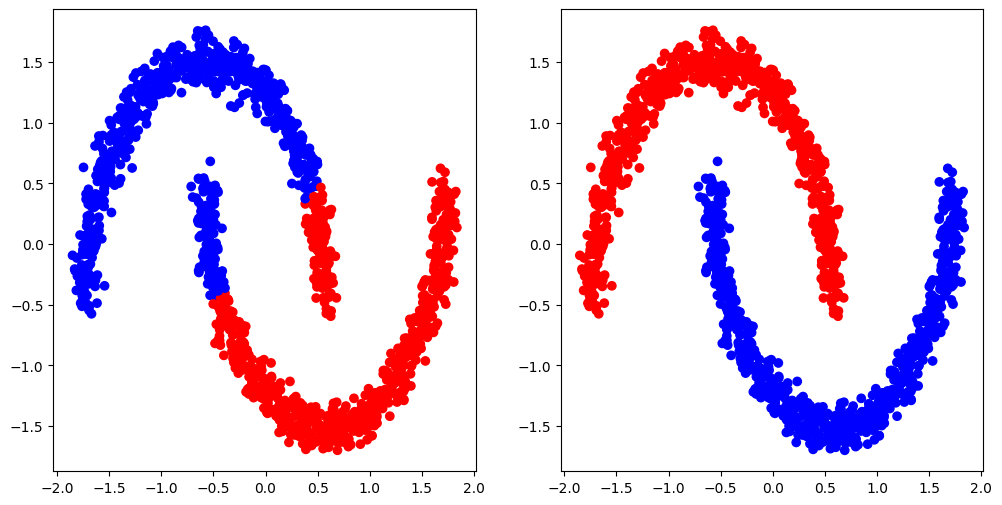

In [13]:
# different algorithms are good for different applications - kmeans and single agglomerative have so far shown very different results

# Create different type of clusters
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)

X = StandardScaler().fit_transform(X)

# Run K-Means on non-radial clusters
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
y1_pred = kmeans.predict(X)

# Run Agglomerative clustering on non-radial clusters
single = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
y2_pred = single.fit_predict(X)

# Review results
options, charts = plt.subplots(1, 2, figsize=(12, 6))
colors = np.array(['blue', 'red'])
charts[0].scatter(X[:, 0], X[:, 1], color=colors[y1_pred])
charts[1].scatter(X[:, 0], X[:, 1], color=colors[y2_pred])
plt.show()

### <a id='toc1_1_3_'></a>[DBSCAN](#toc0_)

WHAT IS DBSCANA

In [14]:
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)

In [15]:
dbs = cluster.DBSCAN(eps=0.05, min_samples = 5) #change maximum distance and see efect
# eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples is the number of samples in a neighborhood for a point to be considered as a core point.

pred = dbs.fit_predict(X)
pred

array([0, 1, 1, ..., 0, 0, 0])

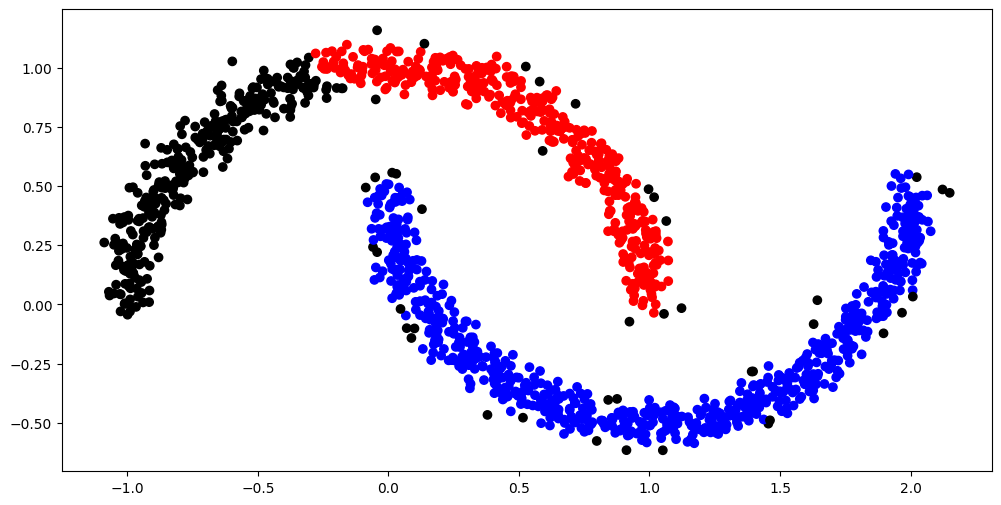

In [16]:

plt.figure(figsize=(12, 6))

colors = np.array(['blue', 'red', 'black'])
plt.scatter(X[:, 0], X[:, 1], color=colors[pred])

plt.show()

### <a id='toc1_1_4_'></a>[Clustering metrics](#toc0_)

**Silhouette Score** [$^{[3]}$](https://www.educative.io/answers/what-is-silhouette-score)

> Silhouette Score is a tool for assessing the appropriateness of clustering results by providing a quantitative measure of how well-defined and distinct the clusters are. The Silhouette Score quantifies **how well a data point fits into its assigned cluster** and **how distinct it is from other clusters** 

Silhouette Score = $\frac{(b - a)}{max(a, b)}$

In [17]:
from sklearn.metrics import silhouette_score

# Re-create clusters
n_samples = 1500
X, y = datasets.make_blobs(n_samples=n_samples, centers=3, cluster_std=0.7, n_features=2, random_state=0)

kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)
pred = kmeans.predict(X)

print("Model 1 Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

# Matplotlib
# plt.figure(figsize=(5, 5))
# plt.scatter(X[:, 0], X[:, 1], c=pred, alpha=0.5)
# plt.show()

# Plotly
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

Model 1 Silhouette Score: 0.6056399066187851


In [18]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3, linkage='complete')
pred = agglomerative.fit_predict(X)

print("Model 2 Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

# Matplotlib
# plt.figure(figsize=(5, 5))
# plt.scatter(X[:, 0], X[:, 1], c=pred, alpha=0.5)
# plt.show()

# Plotly
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

Model 2 Silhouette Score: 0.528140155059521


In [19]:
agglomerative = cluster.AgglomerativeClustering(n_clusters=3, linkage='single')
pred = agglomerative.fit_predict(X)

print("Model 3 Silhouette Score: {}".format(silhouette_score(X, pred, metric='euclidean')))

# Matplotlib
# plt.figure(figsize=(5, 5))
# plt.scatter(X[:, 0], X[:, 1], c=pred, alpha=0.5)
# plt.show()

# Plotly
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

Model 3 Silhouette Score: -0.00722867792759676


> The Silhouette Score ranges from -1 to +1. Here is how to interpret the value: [$^{[3]}$](https://www.educative.io/answers/what-is-silhouette-score)

**Negative**
> A negative score indicates that the **data point is likely assigned to the wrong cluster**, as its distance to its assigned cluster’s points is greater than its distance to the nearest neighboring cluster’s points.

**Close to 0**
> A score close to 0 implies that the **data point is on or very close to the decision boundary between two clusters**. It indicates that the clustering is not well-defined and can be ambiguous.

**Positive**
> A positive score indicates that the **data point is appropriately clustered**, and **its distance to its assigned cluster’s points is smaller than its distance to the nearest neighboring cluster’s points**. A score close to +1 suggests that the data point is well-clustered and distinctly separated from other clusters. It is a strong indication of a meaningful clustering result.

Where does the silhouette score fail to be a good measure?

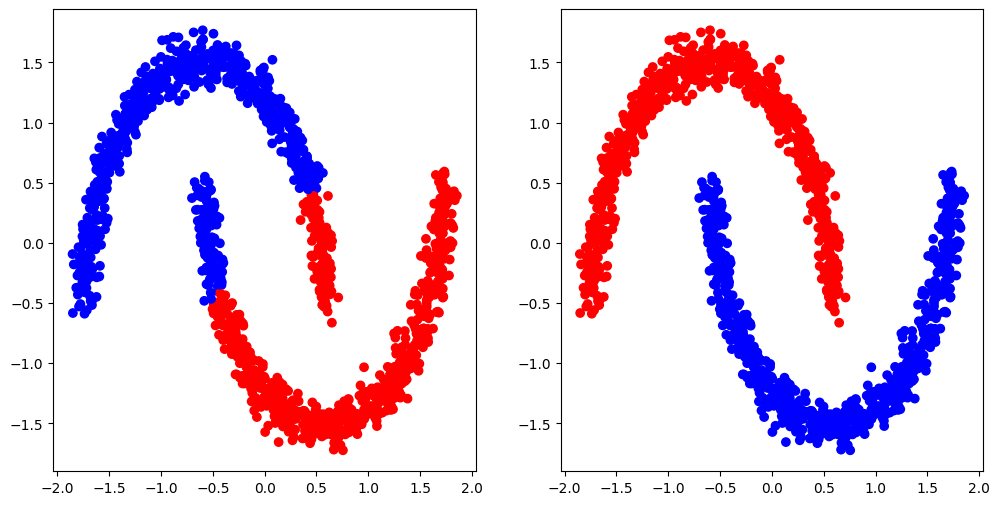

Model 1 Silhouette Score: 0.49992821099240253
Model 2 Silhouette Score: 0.39235132268158


In [20]:
n_samples = 1500
X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
X = StandardScaler().fit_transform(X)

kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(X)
y1_pred = kmeans.predict(X)


single = cluster.AgglomerativeClustering(n_clusters=2, linkage='single')
y2_pred = single.fit_predict(X)


options, charts = plt.subplots(1, 2, figsize=(12, 6))
colors = np.array(['blue', 'red'])
charts[0].scatter(X[:, 0], X[:, 1], color=colors[y1_pred])
charts[1].scatter(X[:, 0], X[:, 1], color=colors[y2_pred])
plt.show()

print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y1_pred)))
print("Model 2 Silhouette Score: {}".format(silhouette_score(X, y2_pred)))

### <a id='toc1_1_5_'></a>[Number of clusters](#toc0_)

In [42]:
from sklearn import cluster, datasets

n_samples = 1500
X, y = datasets.make_blobs(n_samples=n_samples, centers=12, cluster_std=1, n_features=2, random_state=1)

# Matplotlib
# plt.figure(figsize=(5, 5))
# plt.scatter(X[:, 0], X[:, 1],alpha=0.5)
# plt.show()

# Plotly
fig = px.scatter(x=X[:, 0], y=X[:, 1], color=pred, opacity=0.5)
fig.update_layout(height=600, width=600)
fig.show()

# even though data was generated with 12 centers, 5 clusters could make sense, even 7 or 8

We can select a number of clusters using the elbow heuristic:

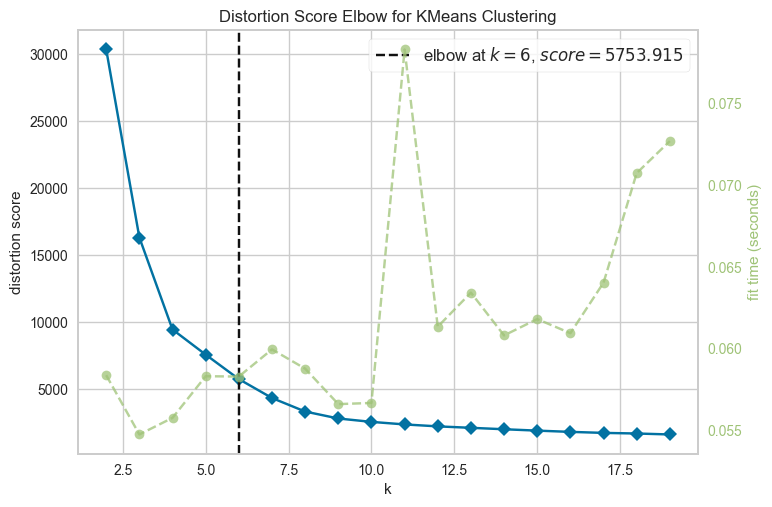

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [98]:
from yellowbrick.cluster import KElbowVisualizer

model = cluster.KMeans(random_state=42, init='random') # Post-edit.
visualizer = KElbowVisualizer(model, k=(2,20))
visualizer.fit(X)
visualizer.poof()

Technically, any k between 4 and 8 would be good enough for this problem. Remember, we're not looking to minimize the error in this case!

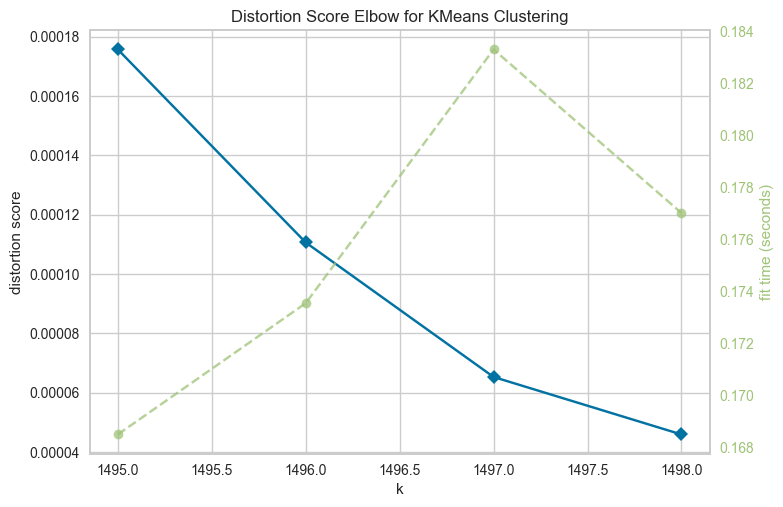

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [23]:
from yellowbrick.cluster import KElbowVisualizer

model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(1495,1499))
visualizer.fit(X)
visualizer.poof()

If we try to minimize the error, we end up with an unusable number of clusters, which defeats the purpose of running the algorithm to begin with.

## <a id='toc1_2_'></a>[Dimensionality reduction](#toc0_)

### <a id='toc1_2_1_'></a>[PCA (Principal Component Analysis)](#toc0_)

Principal Component Analysis (PCA) is a statistical technique used for dimensionality reduction. It transforms the data into a new coordinate system such that the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

![](https://imgs.search.brave.com/1u8pddu4FRUlSAuxj0i992lYN__bYby0JDUEqF2abEM/rs:fit:860:0:0/g:ce/aHR0cHM6Ly9icmFk/bGV5Ym9laG1rZS5n/aXRodWIuaW8vSE9N/TC8xNS1wY2FfZmls/ZXMvZmlndXJlLWh0/bWwvY3JlYXRlLXBj/YS1pbWFnZS0xLnBu/Zw)  
(Source: [Hands-on Machine Learning with R, Bradley Boehmke](https://bradleyboehmke.github.io/HOML/pca.html))

In [24]:
X = cancer['data']
y = cancer['target']
display(X.shape)
display(y.shape)

(569, 30)

(569,)

In [25]:
# let's visualize all the data in a dataframe
data = pd.DataFrame(X, columns=cancer['feature_names'])
data['label'] = y
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


For this dataset, we're not looking to predict whether or not a patient has a malignant/benign tumour, but if we can create 2 clusters corresponding to the most similar tumours. However, we think that the malignant tumours are significantly different from benign tumours, which is why we're looking to see if we can separate clusters based on the tumour type.

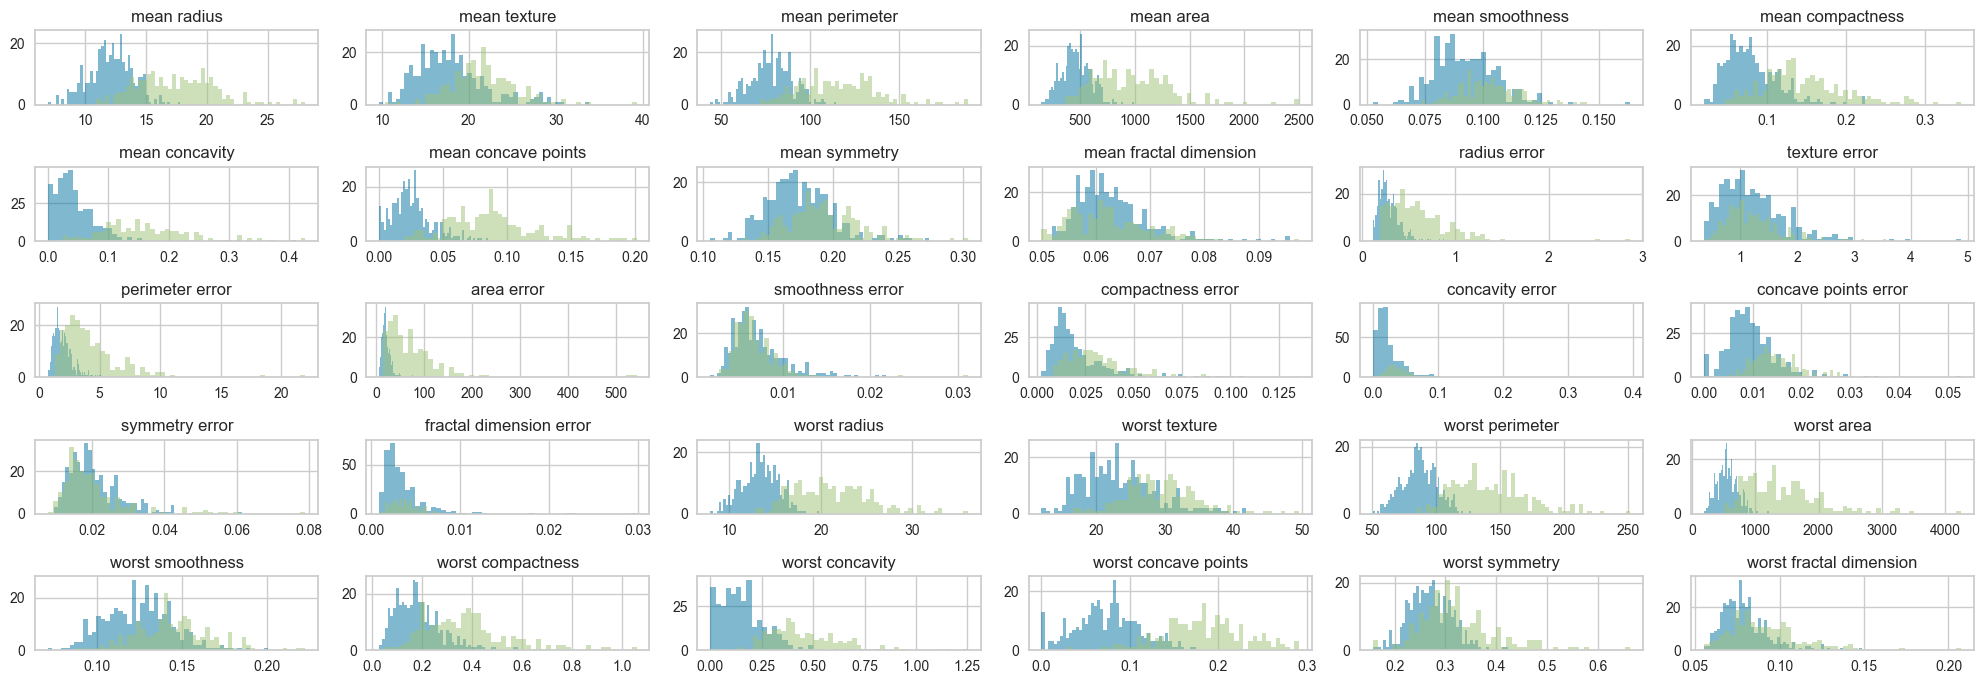

In [26]:
#check differences between features and labels
plot_options, charts = plt.subplots(5, 6, figsize=(20, 7))
malignant = data[data['label'] == 1]
benign = data[data['label'] == 0]
#ravel flattens the array so we don't need 2 indexes
charts_1d = charts.ravel()
for i in range(30):
  charts_1d[i].hist(malignant.iloc[:, i], bins=50, alpha=.5)
  charts_1d[i].hist(benign.iloc[:, i], bins=50, alpha=.5)
  charts_1d[i].set_title(data.columns[i])
  plot_options.tight_layout()

Ideally, we'd want to see if we can cluster the tumours based on multiple features (like we did for the iris dataset some time ago) but in this case we have >30 labels, which makes a pairplot take ages to run...

In [27]:
# sns.pairplot(data, hue = 'label')

We can still look to see if we can separate clusters based on 2 features at a time:

In [28]:
# Cluster boundary for features 1, 29
fig = px.scatter(x=data.iloc[:, 1], y=data.iloc[:, 29], color=y, opacity=0.5)
fig.update_layout(xaxis_title=data.columns[1], yaxis_title=data.columns[29], height=600, width=600)
fig.show()

# Cluster boundary for features 28, 29
fig = px.scatter(x=data.iloc[:, 28], y=data.iloc[:, 29], color=y, opacity=0.5)
fig.update_layout(xaxis_title=data.columns[28], yaxis_title=data.columns[29], height=600, width=600)
fig.show()

In [29]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(cancer['data'])

X_scaled = scaler.transform(cancer['data'])

Why do we need to perform scaling before running the PCA?

In [30]:
from sklearn.decomposition import PCA

# create the PCA object
# the number of components chosen will be the new number of features!
pca = PCA(n_components=3)
# fit the PCA model to breast cancer data
pca.fit(X_scaled)
# it's like we have three new axis (those defined by the PCA principal components)
X_pca = pca.transform(X_scaled)

In [31]:
display(X.shape)
display(X_pca.shape)

(569, 30)

(569, 3)

In [32]:
fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 1], color=y, opacity=0.5)
fig.update_layout(xaxis_title='1st principal component', yaxis_title='2nd principal component', height=600, width=600)
fig.show()

fig = px.scatter(x=X_pca[:, 1], y=X_pca[:, 2], color=y, opacity=0.5)
fig.update_layout(xaxis_title='2nd principal component', yaxis_title='3rd principal component', height=600, width=600)
fig.show()

fig = px.scatter(x=X_pca[:, 0], y=X_pca[:, 2], color=y, opacity=0.5)
fig.update_layout(xaxis_title='1st principal component', yaxis_title='3rd principal component', height=600, width=600)
fig.show()

How to choose the number of principal components?

In [33]:
# Each PCA feature has a little bit of each original feture
# The PCA tells you how much of the original features each new feature contains
pca.components_

array([[ 2.42675774e-01,  9.64786101e-02,  2.52550175e-01,
         2.16494530e-01,  1.09694618e-01,  2.40397602e-01,
         3.01914206e-01,  3.22475470e-01,  1.11431911e-01,
         4.32983397e-02,  1.21760615e-01, -3.91796003e-05,
         1.18580603e-01,  1.03569266e-01, -4.68418094e-03,
         1.29319789e-01,  6.56807080e-02,  1.24746120e-01,
         1.44902467e-02,  4.55013416e-02,  2.59386850e-01,
         1.13833007e-01,  2.60708399e-01,  2.05917767e-01,
         1.23773566e-01,  2.04993413e-01,  2.44083623e-01,
         3.71065064e-01,  9.59229054e-02,  9.46335142e-02],
       [-2.61316697e-01, -5.90579194e-02, -2.38590061e-01,
        -2.31106830e-01,  1.99883951e-01,  2.13914883e-01,
         1.13810591e-01, -8.31206237e-03,  2.11115126e-01,
         4.06392087e-01, -6.68985209e-02,  6.00114468e-02,
        -5.14164640e-02, -8.29631528e-02,  1.35596439e-01,
         2.22352585e-01,  1.02792720e-01,  1.05646780e-01,
         1.40474907e-01,  1.71995173e-01, -2.44281614e-

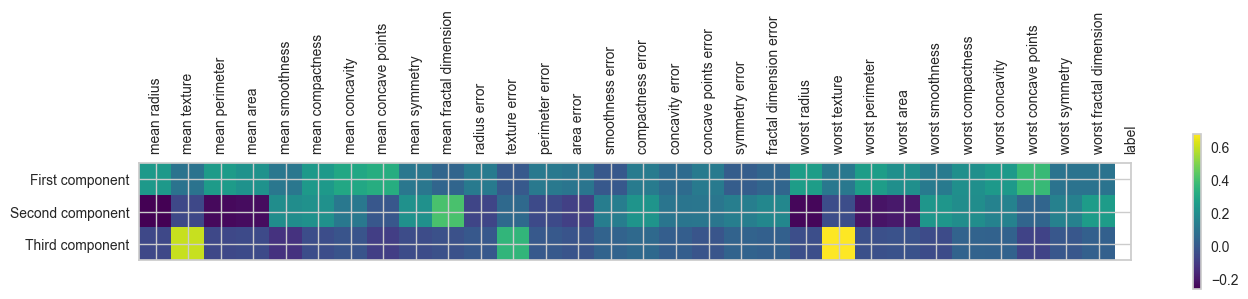

In [34]:
# Matplotlib
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2], ["First component", "Second component","Third component"])
plt.colorbar()
plt.xticks(range(len(data.columns)), data.columns, rotation=90)
plt.show()

# Plotly
# fig = px.imshow(pca.components_, y=['1st component', '2nd component', '3rd component'], x=list(data.columns.drop('label')), color_continuous_scale='viridis')
# fig.update_coloraxes(overwrite=True)
# fig.update_layout(showlegend=False)
# fig.show()

> Mathematically, the new features (principal components) are a LINEAR COMBINATION of the previous (old) features and the weights of each of them are represented in the diagram above.

# <a id='toc2_'></a>[Resources](#toc0_)

PCA by StatQuest:
- [Main ideas (5 min)](https://www.youtube.com/watch?v=HMOI_lkzW08)
- [Step-by-step (22 min)](https://www.youtube.com/watch?v=FgakZw6K1QQ)
- [Practical Tips (8 min)](https://www.youtube.com/watch?v=oRvgq966yZg)  

[t-SNEs by StatQuest (12 min)](https://www.youtube.com/watch?v=NEaUSP4YerM)

# <a id='toc3_'></a>[References](#toc0_)

[1] [What is Silhouette Score, Educative IO](https://www.educative.io/answers/what-is-silhouette-score)

# <a id='toc4_'></a>[Acknowledgements](#toc0_)

Thank you, David Henriques, for your awesome lesson structure and content!